# Group By

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("city_weather_data.csv")
df

,day,city,temp,windspeed,event
0,01-01-2025,new york,32,6,rain
1,01-02-2025,new york,36,7,sunny
2,01-03-2025,new york,28,34,snow
3,01-04-2025,new york,33,23,sunny
4,01-01-2025,mumbai,67,45,sunny
5,01-02-2025,mumbai,54,3,fog
6,01-03-2025,mumbai,54,44,fog
7,01-04-2025,mumbai,34,42,rain
8,01-01-2025,paris,23,45,sunny
9,01-02-2025,paris,44,2,cloudy


In [3]:
g = df.groupby('city')
g

In [4]:
for city, city_df in g:
    print(city)
    print(city_df)
   

mumbai
          day    city  temp  windspeed  event
4  01-01-2025  mumbai    67         45  sunny
5  01-02-2025  mumbai    54          3    fog
6  01-03-2025  mumbai    54         44    fog
7  01-04-2025  mumbai    34         42   rain
new york
          day      city  temp  windspeed  event
0  01-01-2025  new york    32          6   rain
1  01-02-2025  new york    36          7  sunny
2  01-03-2025  new york    28         34   snow
3  01-04-2025  new york    33         23  sunny
paris
           day   city  temp  windspeed   event
8   01-01-2025  paris    23         45   sunny
9   01-02-2025  paris    44          2  cloudy
10  01-03-2025  paris    33         34  cloudy
11  01-04-2025  paris    24         25  cloudy


In [5]:
g.get_group('mumbai')

,day,city,temp,windspeed,event
4,01-01-2025,mumbai,67,45,sunny
5,01-02-2025,mumbai,54,3,fog
6,01-03-2025,mumbai,54,44,fog
7,01-04-2025,mumbai,34,42,rain


In [6]:
g.min()

,day,temp,windspeed,event
city,,,,
mumbai,01-01-2025,34,3,fog
new york,01-01-2025,28,6,rain
paris,01-01-2025,23,2,cloudy


In [7]:
g.mean(numeric_only = True)

,temp,windspeed
city,,
mumbai,52.25,33.5
new york,32.25,17.5
paris,31.00,26.5


In [8]:
g.describe()

temp                                                   windspeed  \
         count   mean        std   min    25%   50%    75%   max     count   
city                                                                         
mumbai     4.0  52.25  13.622897  34.0  49.00  54.0  57.25  67.0       4.0   
new york   4.0  32.25   3.304038  28.0  31.00  32.5  33.75  36.0       4.0   
paris      4.0  31.00   9.763879  23.0  23.75  28.5  35.75  44.0       4.0   

                                                          
          mean        std  min    25%   50%    75%   max  
city                                                      
mumbai    33.5  20.371549  3.0  32.25  43.0  44.25  45.0  
new york  17.5  13.478378  6.0   6.75  15.0  25.75  34.0  
paris     26.5  18.266545  2.0  19.25  29.5  36.75  45.0

city
mumbai      Axes(0.125,0.11;0.775x0.77)
new york    Axes(0.125,0.11;0.775x0.77)
paris       Axes(0.125,0.11;0.775x0.77)
dtype: object

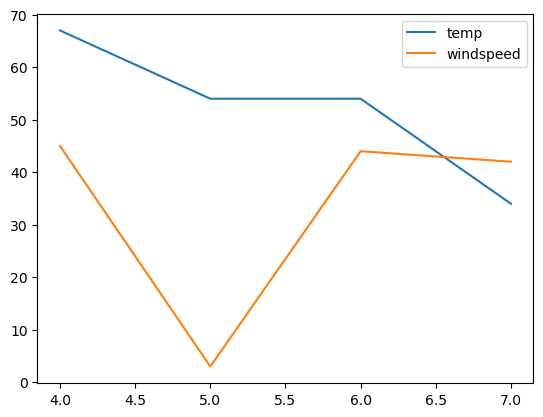

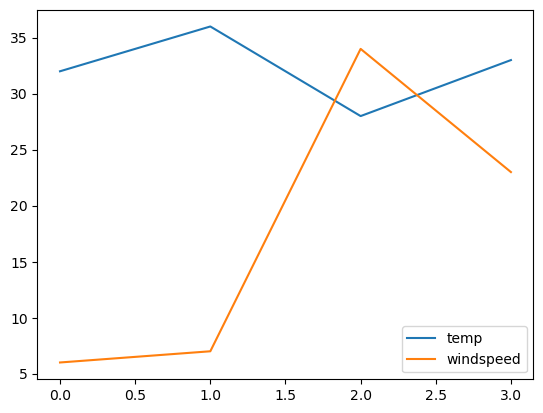

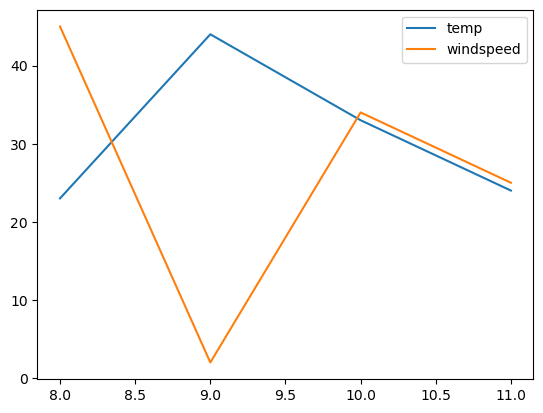

In [9]:
%matplotlib inline
g.plot()

# Concat Dataframe

In [10]:
india_weather = pd.DataFrame({
    'city': ['mumbai','delhi','banglore'],
    'temperature': [32,45,30],
    'humidity': [80,60,77]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,77


In [11]:
usa_weather = pd.DataFrame({
    'city': ['new york','chicago','or lando'],
    'temperature': [21,14,35],
    'humidity': [65,60,65]
})
usa_weather

,city,temperature,humidity
0,new york,21,65
1,chicago,14,60
2,or lando,35,65


In [12]:
df = pd.concat([india_weather, usa_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,77
0,new york,21,65
1,chicago,14,60
2,or lando,35,65


In [13]:
df = pd.concat([india_weather, usa_weather], ignore_index = True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,77
3,new york,21,65
4,chicago,14,60
5,or lando,35,65


In [14]:
df = pd.concat([india_weather, usa_weather],  keys = ['india', 'usa'])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        77
usa   0  new york           21        65
      1   chicago           14        60
      2  or lando           35        65

In [15]:
df.loc['india']

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,77


temp_df = pd.DataFrame({
    'city': ['mumbai','delhi','banglore'],
    'temperature': [34,40,30]
}, index = [0,1,2])
temp_df

In [16]:
windspeed_df = pd.DataFrame({
    'city': ['mumbai','delhi','banglore'],
    'windspeed': [40,50,60]
}, index = [0,1,2])
windspeed_df

,city,windspeed
0,mumbai,40
1,delhi,50
2,banglore,60


In [18]:
df = pd.concat([temp_df, windspeed_df], axis = 1)
df

NameError: name 'temp_df' is not defined

In [19]:
temp_df

NameError: name 'temp_df' is not defined

In [20]:
s = pd.Series(['humid','dry','rain'], name = 'event')
s

0    humid
1      dry
2     rain
Name: event, dtype: object

In [21]:
pd.concat([temp_df,s], axis = 1)

NameError: name 'temp_df' is not defined

# Merge Dataframes

In [22]:
df1 = pd.DataFrame({
    'city': ['new york','chicago','orlando'],
    'temp': [21,14,35]
})
df1

,city,temp
0,new york,21
1,chicago,14
2,orlando,35


In [23]:
df2 = pd.DataFrame({
    'city': ['new york','chicago','orlando', 'california'],
    'humidity': [65,68,76,32]
})
df2

,city,humidity
0,new york,65
1,chicago,68
2,orlando,76
3,california,32


In [24]:
df3 = pd.merge(df1, df2, on = 'city', how = 'outer', indicator = True)
df3     # inner is by default

,city,temp,humidity,_merge
0,california,NaN,32,right_only
1,chicago,14.0,68,both
2,new york,21.0,65,both
3,orlando,35.0,76,both


In [25]:
df1 = pd.DataFrame({
    'city': ['new york','chicago','orlando','baltimore'],
    'temp': [21,14,35,56],
    'humidity': [45,65,25,64]
})
df1

,city,temp,humidity
0,new york,21,45
1,chicago,14,65
2,orlando,35,25
3,baltimore,56,64


In [26]:
df2 = pd.DataFrame({
    'city': ['new york','chicago','orlando','baltimore'],
    'temp': [65,76,44,54],
    'humidity': [45,34,65,76]
})
df2

,city,temp,humidity
0,new york,65,45
1,chicago,76,34
2,orlando,44,65
3,baltimore,54,76


In [27]:

pd.merge(df1,df2, on= 'city', suffixes = ('_left','_right'))

,city,temp_left,humidity_left,temp_right,humidity_right
0,new york,21,45,65,45
1,chicago,14,65,76,34
2,orlando,35,25,44,65
3,baltimore,56,64,54,76


# Pivot Table

In [28]:
df = pd.read_csv("city_weather_data.csv")
df

,day,city,temp,windspeed,event
0,01-01-2025,new york,32,6,rain
1,01-02-2025,new york,36,7,sunny
2,01-03-2025,new york,28,34,snow
3,01-04-2025,new york,33,23,sunny
4,01-01-2025,mumbai,67,45,sunny
5,01-02-2025,mumbai,54,3,fog
6,01-03-2025,mumbai,54,44,fog
7,01-04-2025,mumbai,34,42,rain
8,01-01-2025,paris,23,45,sunny
9,01-02-2025,paris,44,2,cloudy


In [29]:
df.pivot(index = 'day', columns = 'city',values ='temp')

city,mumbai,new york,paris
day,,,
01-01-2025,67,32,23
01-02-2025,54,36,44
01-03-2025,54,28,33
01-04-2025,34,33,24


In [30]:
df = pd.read_csv("city_weather.csv")
df

,date,city,temperature,humidity
0,05-01-2017,new york,65,56
1,05-01-2017,new york,61,54
2,05-02-2017,new york,70,34
3,05-02-2017,new york,72,65
4,05-01-2017,mumbai,23,45
5,05-01-2017,mumbai,56,44
6,05-02-2017,mumbai,45,55
7,05-02-2017,mumbai,44,65


In [31]:
df.pivot_table(index = 'city', columns = 'date', aggfunc = 'mean')

humidity            temperature           
date     05-01-2017 05-02-2017  05-01-2017 05-02-2017
city                                                 
mumbai         44.5       60.0        39.5       44.5
new york       55.0       49.5        63.0       71.0

In [32]:
df.pivot_table(index = 'city', columns = 'date', margins = 'True')

humidity                   temperature                 
date     05-01-2017 05-02-2017    All  05-01-2017 05-02-2017   All
city                                                              
mumbai        44.50      60.00  52.25       39.50      44.50  42.0
new york      55.00      49.50  52.25       63.00      71.00  67.0
All           49.75      54.75  52.25       51.25      57.75  54.5

In [33]:
df = pd.read_csv("city2_weather.csv")
df

,date,city,temp,humidity
0,05-01-2017,new york,45,56
1,05-02-2017,new york,65,54
2,05-03-2017,new york,44,64
3,12-01-2017,new york,54,45
4,12-02-2017,new york,54,34
5,12-03-2017,new york,45,65


In [34]:
df['date'] = pd.to_datetime(df['date'])
df

,date,city,temp,humidity
0,2017-05-01,new york,45,56
1,2017-05-02,new york,65,54
2,2017-05-03,new york,44,64
3,2017-12-01,new york,54,45
4,2017-12-02,new york,54,34
5,2017-12-03,new york,45,65


In [35]:
df.pivot_table(index = pd.Grouper(freq = 'M', key = 'date'), columns ='city')

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26732\610065065.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.pivot_table(index = pd.Grouper(freq = 'M', key = 'date'), columns ='city')


,humidity,temp
city,new york,new york
date,,
2017-05-31,58.0,51.333333
2017-12-31,48.0,51.000000


# Reshape df using melt

In [36]:
df = pd.read_csv("weekly_weather.csv")
df

,day,chicago,chennai,berlin
0,Monday,34,23,46
1,Tuesday,43,45,65
2,Wednesday,54,45,23
3,Thursday,23,34,56
4,Friday,43,54,45
5,Saturday,56,34,44
6,Sunday,43,56,42


In [37]:
df1 = pd.melt(df, id_vars = ['day'])
df1

,day,variable,value
0,Monday,chicago,34
1,Tuesday,chicago,43
2,Wednesday,chicago,54
3,Thursday,chicago,23
4,Friday,chicago,43
5,Saturday,chicago,56
6,Sunday,chicago,43
7,Monday,chennai,23
8,Tuesday,chennai,45
9,Wednesday,chennai,45


In [38]:
df1 = pd.melt(df, id_vars = ['day'])
df1[df1['variable'] == 'chicago']

,day,variable,value
0,Monday,chicago,34
1,Tuesday,chicago,43
2,Wednesday,chicago,54
3,Thursday,chicago,23
4,Friday,chicago,43
5,Saturday,chicago,56
6,Sunday,chicago,43


In [39]:
df1 = pd.melt(df, id_vars = ['day'], var_name = 'city', value_name ='temp')
df1

,day,city,temp
0,Monday,chicago,34
1,Tuesday,chicago,43
2,Wednesday,chicago,54
3,Thursday,chicago,23
4,Friday,chicago,43
5,Saturday,chicago,56
6,Sunday,chicago,43
7,Monday,chennai,23
8,Tuesday,chennai,45
9,Wednesday,chennai,45


In [40]:
df = pd.read_csv("stock_file.csv", header = [0,1])
df

Unnamed: 0_level_0 price                     P/E                 
             company    Fb google micrisoft     Fb google microsoft
0          05-Jun-17   155    955        66  37.56  65.00     76.87
1          06-Jun-17   150    987        69  45.55  31.65     56.76

In [41]:
df.stack(level = 0)

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26732\4254682145.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.stack(level = 0)


company      Fb  google  micrisoft  microsoft
0 P/E                       NaN   37.56   65.00        NaN      76.87
  Unnamed: 0_level_0  05-Jun-17     NaN     NaN        NaN        NaN
  price                     NaN  155.00  955.00       66.0        NaN
1 P/E                       NaN   45.55   31.65        NaN      56.76
  Unnamed: 0_level_0  06-Jun-17     NaN     NaN        NaN        NaN
  price                     NaN  150.00  987.00       69.0        NaN